# MA 346 Midterm Project
### By: Annie DeForge and Rashmi Rajesh

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
from statsmodels.stats import weightstats as stests

# Loading the Data


Load the united dataframe made by combining the election data from npr and the population and daily covid count for each state from usa facts. The data have been manipulated to remove district and country level rows from the dataset.

In [ ]:
grouped = pd.read_csv('ma_346_midterm_dataset.csv')

# Fitting the Logistic Curve

To understand the patterns in the covid data, we need to create a model for the growth of cases in each state. We will use the curve_fit function from scipy to fit the data to a logisitc function. 

A logistic equation y = M/(1+exp(r*(-t+t0))), where M is the maximum value, r is the growth rate, and t0 is the midpoint. This equation creates a sigmoid curve with some natural growth that eventually reaches some maximum that we expect the spread of a pandemic to take.

We will input the covid data from each row to find the parameters that best fit the logistic model for each state.

In [ ]:
def logistic_analysis (x, beta0, beta1, beta2):
  return beta0/(1+np.exp(beta1*(-x+beta2)))

def generate_model(data):
  y = data.values.tolist()
  xdata = np.arange(1, total_days+1, 1).tolist()
  guessed_betas = [data.max(), 1, total_days/2]
  try:
    popt, pcov = curve_fit(logistic_analysis, xdata, y, p0=guessed_betas)
    return popt
  except:
    return None

parameters = pd.Series
new_index = grouped.set_index('State')
covid = new_index.loc[:, '2020-01-22':'2021-02-21']
total_days = (len(covid.columns))
parameters = covid.apply(generate_model, axis=1)
beta = pd.DataFrame(parameters, columns=['Beta'])
beta = beta['Beta'].apply(pd.Series)

beta = beta.rename(columns =lambda x : 'Beta_' + str(x))
merged = pd.merge(left = grouped, right =beta, how='left', left_on='State', right_on='State')

NameError: ignored

There are two functions that are defined, first logistic_analysis is used the equation for the model, the second function generate_model uses .apply() in order to evaluate only one row at a time so that the each state own covid count is the y data being fitted for the logistic curve. 

Because the dataframe grouped contains columns that won't be needed, the none covid count cases are dropped before getting passed through the generate_model function. The index for this new dataframe is also changed to the state for that row, this is so the beta values are indexed by state and will later be able to be merged back with the rest of the columns in a datframe called merged. 

In the generate_model function .tolist() is used because it is read in as an array and curve_fit only accepts lists. The guessed values are the max number of cases for each state, a rate of 1, and half the number of days so far. 

Sometimes, curve_fit fails to find the best parameters, so there is a try except statement which fills the parameters for that row with null values.

# Correlation Coefficient Heat Maps

In order to determine if variables relating to coronavirus data were related to a state's political leaning, heat maps of correlation coefficients of various corona virus factors were mapped alongside a state's political leaning.

Factors considered were: 


* 	most recent number of cases
*   most recent number of cases per capita
*   projected maximum number of cases
*   projected maximum number of cases per capita
*   rate of increase
*   time of maximum increase


We imported seaborn to create an easy to read heatmap for each factor 
 



### Most Recent Number of Cases
Given the fact that our covid data is as of February 21st, 2021, the most recent number of cases is the quantity in our dataset as of February 21st. 

Using the merged data frame that has the columns for number of voters in each state that voted either Clinton or Trump, and the recent number of cases as of February 21st, we constructed out heat map by first calculating the correlation coefficients and then graphing the correlation in the heatmap.



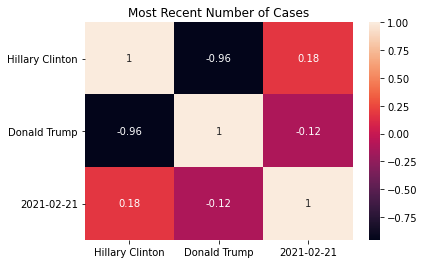

In [ ]:
merged_a = merged[['Hillary Clinton', 'Donald Trump', '2021-02-21']]
correlation_coefficients_a = np.corrcoef(merged_a, rowvar=False)
sns.heatmap(correlation_coefficients_a, annot=True)
plt.xticks(np.arange(3)+0.5, merged_a.columns)
plt.yticks(np.arange(3)+0.5, merged_a.columns, rotation=0)
plt.title('Most Recent Number of Cases')
plt.show()

The heatmap for the most recent number of cases concluded that there was a slight positive correlation (0.18) between the recent number of cases and votes for Hillary Clinton while there was a slight negative correlation (-0.18) between the recent number of cases and votes for Donald Trump.


### Most Recent Number of Cases Per Capita
Given the fact that our covid data is as of February 21st, 2021, the most recent number of cases is the quantity in our dataset as of February 21st. However in order to look at the cases per capita, we divided the current number of cases in each state by the population in each state.

Using the merged data frame that has the columns for number of voters in each state that voted either Clinton or Trump, and the recent number of cases as of February 21st, we constructed out heat map by first calculating the correlation coefficients and then graphing the correlation in the heatmap.



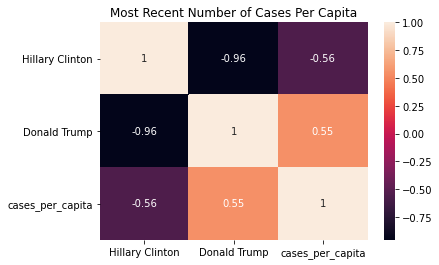

In [ ]:
#most recent number of cases per capita
merged['cases_per_capita'] = merged['2021-02-21']/merged['population']
merged_b = merged[['Hillary Clinton', 'Donald Trump', 'cases_per_capita']]
correlation_coefficients_b = np.corrcoef(merged_b, rowvar=False)
sns.heatmap(correlation_coefficients_b, annot=True)
plt.xticks(np.arange(3)+0.5, merged_b.columns)
plt.yticks(np.arange(3)+0.5, merged_b.columns, rotation=0)
plt.title('Most Recent Number of Cases Per Capita')
plt.show()

The heatmap for the most recent number of cases per capita concluded that there was a significant negative correlation (-0.56) between the recent number of cases per capita and votes for Hillary Clinton while there was a significant positive correlation (0.55) between the recent number of cases and votes for Donald Trump.


### Project Max Number of Cases
The projected max number of cases is captured using the 'Beta_0' column from our merged data set.

Therefore the merged data frame that has the columns for number of voters in each state that voted either Clinton or Trump, and the 'Beta_0', we constructed out heat map by first calculating the correlation coefficients and then graphing the correlation in the heatmap.



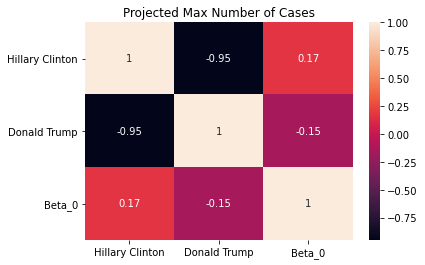

In [ ]:
# projected max number of cases
merged_c = merged[['Hillary Clinton', 'Donald Trump', 'Beta_0']].dropna()
correlation_coefficients_c = np.corrcoef(merged_c, rowvar=False)
sns.heatmap(correlation_coefficients_c, annot=True)
plt.xticks(np.arange(3)+0.5, merged_c.columns)
plt.yticks(np.arange(3)+0.5, merged_c.columns, rotation=0)
plt.title('Projected Max Number of Cases')
plt.show()

The heatmap for the projected max number of cases concluded that there was a slight positive correlation (0.17) between the projected number of max cases and votes for Hillary Clinton while there was a slight negative correlation (-0.15) between the projected number of cases and votes for Donald Trump.


### Project Max Number of Cases Per Capita 
The projected max number of cases is captured using the 'Beta_0' column from our merged data set. However in order to look at the cases per capita, we divided the current number of cases in each state by the population in each state.

Therefore the merged data frame that has the columns for number of voters in each state that voted either Clinton or Trump, and the 'Beta_0', we constructed out heat map by first calculating the correlation coefficients and then graphing the correlation in the heatmap.


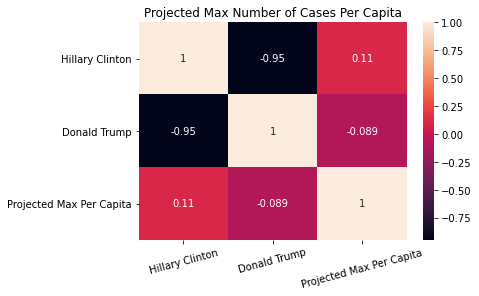

In [ ]:
# projected max number of cases per capita
merged['Projected Max Per Capita'] = merged['Beta_0']/merged['population']
merged_d = merged[['Hillary Clinton', 'Donald Trump', 'Projected Max Per Capita']].dropna()
correlation_coefficients_d = np.corrcoef(merged_d, rowvar=False)
sns.heatmap(correlation_coefficients_d, annot=True)
plt.xticks(np.arange(3)+0.5, merged_d.columns, rotation=15)
plt.yticks(np.arange(3)+0.5, merged_d.columns, rotation=0)
plt.title('Projected Max Number of Cases Per Capita')
plt.show()

The heatmap for the projected max number of cases per capita concluded that there was a slight positive correlation (0.11) between the projected number of max cases and votes for Hillary Clinton while there was a slight negative correlation (-0.089) between the projected number of cases per capita and votes for Donald Trump.


### Rate of Increase
The rate of increase of cases is captured using the 'Beta_1' column from our merged data set. 

Therefore we used the merged data frame that has the columns for number of voters in each state that voted either Clinton or Trump, and the 'Beta_1', in order to construct our heat map by first calculating the correlation coefficients and then graphing the correlation in the heatmap.


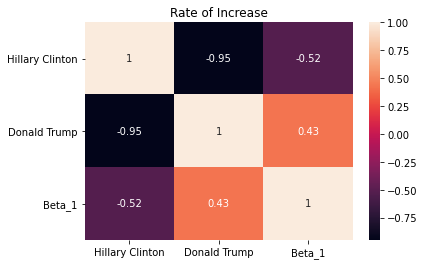

In [ ]:
#rate of increase
merged_e = merged[['Hillary Clinton', 'Donald Trump', 'Beta_1']].dropna()
correlation_coefficients_e = np.corrcoef(merged_e, rowvar=False)
sns.heatmap(correlation_coefficients_e, annot=True)
plt.xticks(np.arange(3)+0.5, merged_e.columns)
plt.yticks(np.arange(3)+0.5, merged_e.columns, rotation=0)
plt.title('Rate of Increase')
plt.show()

The heatmap for the rate of increase of cases included that there was a significant negative correlation (-0.52) between the rate of increase and votes for Hillary Clinton while there was a significant positive correlation (0.43) between the projected number of cases per capita and votes for Donald Trump.


### Time of Maximum Increase
The time of maximum increase is captured using the 'Beta_2' column from our merged data set. 

Therefore we used the merged data frame that has the columns for number of voters in each state that voted either Clinton or Trump, and the 'Beta_2', in order to construct our heat map by first calculating the correlation coefficients and then graphing the correlation in the heatmap.


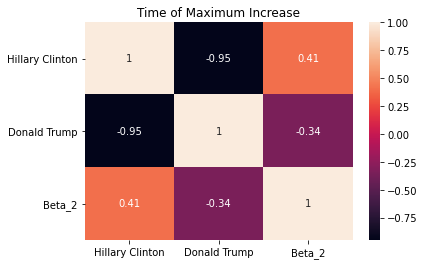

In [ ]:
#time of maximum increase
merged_f = merged[['Hillary Clinton', 'Donald Trump', 'Beta_2']].dropna()
correlation_coefficients_f = np.corrcoef(merged_f, rowvar=False)
sns.heatmap(correlation_coefficients_f, annot=True)
plt.xticks(np.arange(3)+0.5, merged_f.columns)
plt.yticks(np.arange(3)+0.5, merged_f.columns, rotation=0)
plt.title('Time of Maximum Increase')
plt.show()

The heatmap for the time of maximum increase concluded that there was a somewhat positive correlation (0.41) between the rate of increase and votes for Hillary Clinton while there was a somewhat negative correlation (-0.34) between the projected number of cases per capita and votes for Donald Trump.


# Hypothesis Testing of Politcal Affiliation and Time of Maximum Increase in Cases and Cases Per Capita

### Time of Maximum Increase
We identified that the heatmap for the time of maximum increase concluded that there was a somewhat positive correlation (0.41) between the rate of increase and votes for Hillary Clinton while there was a somewhat negative correlation (-0.34) between the projected number of cases per capita and votes for Donald Trump.

This was interesting as it seemed to indicated that there was a variation in the number of cases at the height of the pandemice solely based on a state's political affinity to either Trump or Clinton, prompting further investigation via a Hypothesis Test.

First we created a winner column that identified the winner of each state. Since our data frame has the column 'Hillary Clinton' before 'Donald Trump' we subracted the votes for Trump from Clinton in each state. If the number is positive it meant Clinton won the state as she had more votes. If the number is negative it meant Trump won the state as he had more votes.

In [ ]:
# finding the winner
merged['margin'] = merged['Hillary Clinton'] - merged['Donald Trump']
merged['winner'] = ['Clinton' if x > 0 else 'Trump' for x in merged['margin']]
#print(merged)

After identifying the winner column, we processed to conduct a two sample x-test comparing the means of the cases at the time of maximum increase for either candidate. 

We first isolated each candidate into a merged_h data frame for Hillary Clinton and a merged_d data frame for Donald Trump, to allow us to calculate the means of cases at the time of maximum increase for either candidate. 

Our null hypothesis was that there was no difference in the mean cases at the time of maximum increase for either candidate. 

Our data met the assumptions needed to proceed with the two sample z-test:


1.   The samples of data from each population was independent of each other as each states votes did not influence another state's votes and we utilized all the votes for each candidate and did not take a sample from the votes for each candidate in each state
2.   The population was normally distributed as it was all the votes cast in each candidate in each state

We calculated this test with 95% confidence


In [ ]:
# hypothesis testing

clinton = merged['winner'] == 'Clinton'
merged_h = merged[clinton].dropna()
trump = merged['winner'] == 'Trump'
merged_d = merged[trump].dropna()

print(merged_d['Beta_2'].mean())

diff = merged_h['Beta_2'].mean() - merged_d['Beta_2'].mean()
print(diff)

ztest ,pval1 = stests.ztest(merged_h['Beta_2'], x2=merged_d['Beta_2'], value=0,alternative='two-sided')
print(float(pval1))

if pval1 <0.05:
  print("we reject null hypothesis")
else:
  print("we fail to reject null hypothesis")



431.1025935163745
363.8832204098896
67.21937310648491
0.04905242163141174
we reject null hypothesis


This test rejected the null hypothesis that the means cases at the time of maximum increase were the same indicating that the difference in means is statistically significant.

### Cases Per Capita
We identified that the heatmap for the most recent number of cases per capita concluded that there was a significant negative correlation (-0.56) between the recent number of cases per capita and votes for Hillary Clinton while there was a significant positive correlation (0.55) between the recent number of cases and votes for Donald Trump.

This was interesting as it seemed to indicate that there was a variation in the per capita of recent cases solely based on a state's political affinity to either Trump or Clinton, prompting further investigation via a Hypothesis Test.

We used the same winner column again, but this time conducted the hypothesis using 'cases_per_capita which captured the cases per capita in each state.

We processed to conduct a two sample x-test comparing the means of cases_per_capita for either candidate.

Used the merged_h data frame for Hillary Clinton and merged_d data frame for Donald Trump used in the prevous hypothesis test to allow us to calculate the means of cases_per_capita for either candidate.

Our null hypothesis was that there was no difference in the means of cases_per_capita for either candidate.

Our data met the assumptions needed to proceed with the two sample z-test:

The samples of data from each population was independent of each other as each states votes did not influence another state's votes and we utilized all the votes for each candidate and did not take a sample from the votes for each candidate in each state
The population was normally distributed as it was all the votes cast in each candidate in each state
We calculated this test with 95% confidence

In [ ]:

diff_2 = merged_h['cases_per_capita'].mean() - merged_d['cases_per_capita'].mean()
print("Difference in Means for Rate of Increase: " , diff_2)

ztest ,pval1 = stests.ztest(merged_h['cases_per_capita'], x2=merged_d['cases_per_capita'], value=0,alternative='two-sided')
print("p-value: ", float(pval1))

if pval1 <0.05:
  print("we reject null hypothesis")
else:
  print("we fail to reject null hypothesis")

Difference in Means for Rate of Increase:  -0.03141628869092558
p-value:  2.653546257789168e-07
we reject null hypothesis




This test rejected the null hypothesis that the means of cases_per_capita for either candidate indicating that the difference in means is statistically significant.

# Appendix


This is our code we used to take in the three separate csv files, and combined them into our final data set, and then exported in a csv file.

In [ ]:
#npr data
#npr = pd.read_csv('/content/drive/My Drive/MA 346 Project 1/npr_2016_election_data.csv')
#df_npr = pd.DataFrame(npr)
#df_npr_filter = df_npr[~(df_npr.State.str.len() > 2)]
#new_df_npr_filter = df_npr_filter.sort_values('State').reset_index()
#npr_grouped = new_df_npr_filter[['State', 'Hillary Clinton','Donald Trump']]
#print(npr_grouped)

#covid confirmed by state
#covid = pd.read_csv('/content/drive/My Drive/MA 346 Project 1/covid_confirmed_usafacts.csv')
#df_covid = pd.DataFrame(covid)
#covid_filter = df_covid.groupby('State').sum()
#covid_grouped = covid_filter.loc[ : , "2020-01-22":]
#print(covid_grouped)

#population by state
#pop = pd.read_csv('/content/drive/My Drive/MA 346 Project 1/covid_county_population_usafacts.csv')
#df_pop = pd.DataFrame(pop)
#pop_filter = df_pop.groupby('State').sum()
#pop_grouped = pop_filter[['population']]
#print(pop_grouped)

#grouped = pd.merge(pd.merge(npr_grouped, pop_grouped, on='State'), covid_grouped, on='State')
#grouped_final = grouped[['State', 'Hillary Clinton', 'Donald Trump', '2021-02-21', 'population']]
#print(grouped)

#grouped.to_csv('/content/drive/My Drive/MA 346 Project 1/ma_346_midterm_dataset.csv', index = False)